## Basic Exploration of Spectrogram Generation, Subsetting using Smoothing

## Setup needed packages

In [177]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath('../src'))
import conf
import librosa
%matplotlib inline

## Load 10 seconds from a  wav file

In [178]:
wav_file=os.path.join(conf.wav_path, conf.target_file_test + '.wav')
samples, sample_rate = librosa.load(wav_file, offset=346, duration=10)

## Display the spectrogram

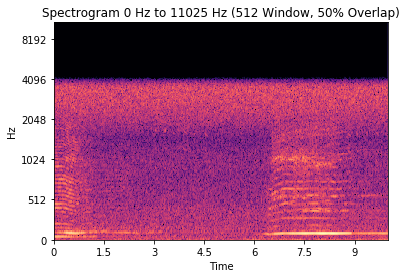

In [187]:
window_size = 512
overlap = 0.5
nyquist = int(sample_rate/2)
stp = int(window_size * (1 - overlap))
stft = np.abs(librosa.stft(y=samples, n_fft=window_size, hop_length=stp)) 
log_S = librosa.amplitude_to_db(stft)
librosa.display.specshow(log_S, x_axis='time', y_axis='mel', sr=sample_rate)
plt.title(f'Spectrogram 0 Hz to {nyquist} Hz ({window_size} Window, {int(overlap*100)}% Overlap)');

## Subset the spectrogram

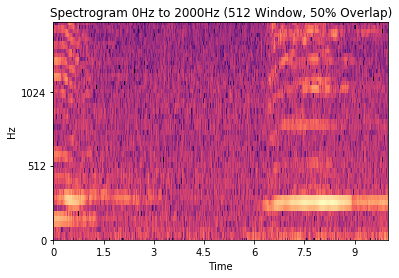

In [195]:
low_freq = 0
high_freq = 2000
hop_length = int(window_size * (1 - overlap))
samples, sample_rate = librosa.load(wav_file, offset=346, duration=5)
#P = librosa.feature.melspectrogram(samples, n_fft=window_size, hop_length=hop_length, sr=sample_rate, power=1)
stft = np.abs(librosa.stft(y=samples, n_fft=window_size, hop_length=stp)) 
freq_bin = float(stft.shape[0]) / float(sample_rate / 2) # Hz/bin
minM = -1 * round(stft.shape[0] - int(low_freq * freq_bin))
maxM = -1 * round(stft.shape[0] - int(high_freq * freq_bin))
stft_subset = stft[minM:maxM]
log_P = librosa.amplitude_to_db(stft_subset)
librosa.display.specshow(log_P, x_axis='time', y_axis='mel', fmin=low_freq, fmax=high_freq, sr=sample_rate)
plt.title(f'Spectrogram {low_freq}Hz to {high_freq}Hz ({window_size} Window, {int(overlap*100)}% Overlap)');

## Smooth the spectrogram

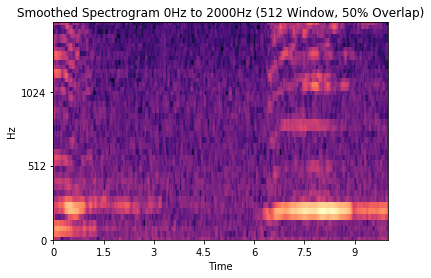

In [197]:
# pad with zeros along the edges to deal with boundary effects from the convolution
zero_pad = 1
npad = ((0, 0), (zero_pad, zero_pad))
stft_subset = np.pad(stft_subset, pad_width=npad, mode='constant', constant_values=0)
# Smooth and remove edges
inner = 3
filter = np.ones(inner)
blur = 'time'
if blur is 'time':
    stft_blur = np.apply_along_axis(lambda m: np.convolve(m, filter, mode='same'), axis=1, arr=stft_subset)
elif blur is 'frequency':
    stft_blur = np.apply_along_axis(lambda m: np.convolve(m, filter, mode='same'), axis=0, arr=stft_subset)
else:
    stft_blur = np.apply_along_axis(lambda m: np.convolve(m, filter, mode='same'), axis=1, arr=stft_subset)
num_cols = stft_blur.shape[1] - zero_pad - 1
num_rows = stft_blur.shape[0] - zero_pad - 1
stft_blur_subset = stft_blur[zero_pad + 1:num_rows, zero_pad + 1:num_cols]
freqbins, timebins = np.shape(stft_blur_subset)
sample_len = len(samples)
log_P_blur = librosa.amplitude_to_db(stft_blur_subset)
librosa.display.specshow(log_P_blur, x_axis='time', y_axis='mel', fmin=low_freq, fmax=high_freq, sr=sample_rate)
plt.title(f'Smoothed Spectrogram {low_freq}Hz to {high_freq}Hz ({window_size} Window, {int(overlap*100)}% Overlap)');
